#### SKIN TONE SHIFT INDEX

Skin Tone Shift Index (STSI): 
To measure the perceptual color difference between the original and re-colorized skin tones in a face image.

Dataset: UTKFace, which contains face images labeled by race. Selected races:White, Black, Asian, and Indian

The LAB color is a color representation model designed to approximate human vision. It expresses color using three components:

•	L: Lightness, ranging from 0 (black) to 100 (white).

•	A: Green–Red axis, where negative values indicate green and positive values indicate red.

•	B: Blue–Yellow axis, where negative values indicate blue and positive values indicate yellow.

Lab color makes it particularly useful for detecting small color differences.


#### Methodology

1. Skin Region Extraction
   
	•	Used a pretrained BiSeNet model (trained on CelebAMask-HQ) to perform face parsing(ResNet Backbone)

	•	Extracted the skin region only (ignoring lips, hair, etc.)

	•	This was done for both the original and re-colorized images

2. Color Conversion
   
	•	Converted the skin pixels from RGB to LAB color space

	•	LAB allows fair comparison since it aligns with how humans perceive color

3. STSI Computation
   
	•	For each image pair:
		Compute the mean LAB vector over the skin region, Use Euclidean distance to find the STSI

4. Analysis
	•	Repeated this across images per race

	•	Then calculated the mean STSI per race


#### Results

Original Image

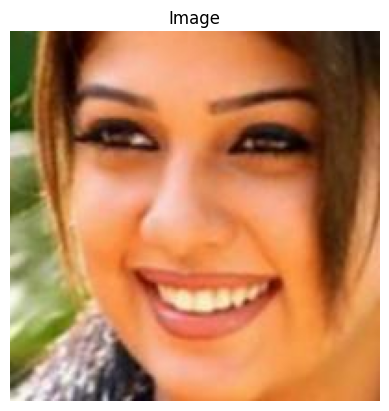

In [1]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/Users/sneha/Deep_Learn/project/project/final-project/Indian-face/20_1_3_7.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Image")
plt.show()

Re-colored Image

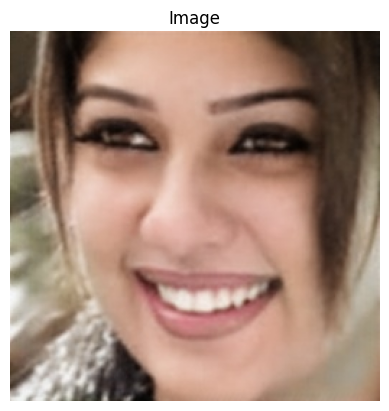

In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/Users/sneha/Deep_Learn/project/project/final-project/Indian-results/20_1_3_7.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Image")
plt.show()

Mean LAB (Image 1): [165.53689645 154.62622735 167.46239498]

Mean LAB (Image 2): [163.25674329 140.76344639 143.76791513]

STSI (Skin Tone Shift Index): 27.546400306904243


This is a significant perceptual change.

Loss of warmth: 

 Both A (redness) and B (yellowness) dropped sharply. This suggests the warm, orange-toned skin of the original image was desaturated toward a cooler, neutral tone, consistent with whitening.
Slight lightening: The L value dropped slightly, but the more notable shift is in color rather than brightness. This aligns with "whitewashing" not through brightness, but through loss of skin hue.


**Biased Color Normalization**

The colorization model may be:

•	Shifting skin tones toward a standard pale base

•	Failing to preserve race-specific hue characteristics (golden, tan, reddish tones)

•	Minimizing diversity in skin color, which is a subtle form of racial bias

In this specific case, the STSI was 27.55: much higher than typical thresholds for perceptual similarity. The LAB shift shows a strong reduction in red and yellow tones, indicating the original golden complexion was flattened into a pale, less saturated tone.  It's a sign that the model is unintentionally normalizing warm skin tones toward a lighter default, possibly due to a lack of training in diverse face images.
